# Forward problem: (Inversion sampling)

```{contents} Table of Contents
:depth: 3
```

There are many different definitions for what is commonly called "The forward problem".
We will define the forward problem as the following task:

*Given a (1) model and (2) parameter values then produce a feasible set of observations*

## Definition of a model 

What do we mean when we say "a model"? 
A model---in the most abstract terminology---is a collection of probability distributions $\mathcal{P}$ over a sample space $\mathcal{G}$ of potential measurements. 
In other words, we can define a model as the following two objects

\begin{align}
    \mathcal{P} &= \{ F_{\theta}  | \theta \in \Theta \}\\ 
    \mathcal{G} &= \{ (x_{1},x_{2}, \cdots, x_{k}) | x_{k} \in \mathbb{R}  \}
\end{align}

where the input for $F_{\theta}$, the cumulative density function (cdf), is all possible points in the sample space $\mathcal{G}$.
That is, we assume that  $F_{\theta}$ is a cdf that can input points like $(x_{1},x_{2}, \cdots, x_{k})$. 
Note that every point $\theta \in \Theta$ will specify exactly one assignment of probabilities to all points in the sample space.

This definition of a model is abstract, but encompasses almost all feasible types of models that we can specify. 


**Example** 

Suppose we work for a public health office and are asked to begin modeling the incidence of influenza over during the typical 32-week influenza season.
We assume that, for the person requesting this model, it is sufficient to provide a probability density over the potential number of weekly lab-confirmed cases of influenza in the public health office's jurisdiction.
The number of cases that we could observe (could measure) in one week starts at 0 (no cases this week) and end at the total number of individuals living in the jurisdiction (we will call this value $N$). 

Then the sample space is $\mathcal{G} = \{ (x_{1},x_{2}, \cdots, x_{32}) \;| \; x_{k} \in [0,N] \}$

Further, we will assume that the number of cases each week is drawn from a Poisson distribution with parameter $\lambda$. 
That is, for week $k$, we assume $x_{k} \sim \text{Poisson}(\lambda_{k})$. 
If we further assume that the number of cases in week $k$ is statistically independent from cases in week $l$ then the probability of measuring less than $x_{k}$ cases in week $k$ and less than $x_{l}$ cases in week $l$ equals 

\begin{align}
    F(x_{k},x_{l}) = F(x_{k} | \lambda_{k}) \cdot F(x_{l} | \lambda_{l})
\end{align}

where $(\lambda_{k}, \lambda_{l}) \in \mathbb{R}^{+} \times \mathbb{R}^{+}$

If we can write down our collection of probabilities for two points then we can write this collection for $32$ points

\begin{align}
    \mathcal{P} = \left\{\prod_{k=1}^{32} F(x_{k} | \lambda_{k}) \;|\;  (\lambda_{1},\lambda_{2},\cdots,\lambda_{32} ) \in (\mathbb{R}^{+})^{32} \right\}\\
\end{align}

We can generate a dataset---a tuple of possible measurements---from the above model if we are given a set of 32 parameter values and a method for drawing values from the Poisson distribution. 

## Inverse transform sampling 


\begin{align}
    X &\sim f_{X} \\ 
    Y = F_{X}(X)
\end{align}

\begin{align}
    supp(Y) &= [0,1]\\ 
\end{align}

\begin{align}|
    P(Y < y) &= P( F_{X} < y  ) \\ 
             &= P( X < F^{-1}_{X}(y)  )\\
             &= F_{X}( F^{-1}_{X}(y) ) = y
\end{align}

\begin{align}
    Y \sim \text{Uniform}(0,1)
\end{align}


\begin{align}
    Y &\sim \text{Uniform}(0,1) \\ 
    X &= F^{-1}_{X}(Y) \\ 
\end{align}

\begin{align}
    P(X < x) &= P(F^{-1}_{X}(Y) < x) \\ 
    &= P(Y < F_{X}(x) ) \\ 
    &= F_{Y}( F_{X}(x) ) \\
    &=  F_{X}(x)
\end{align}



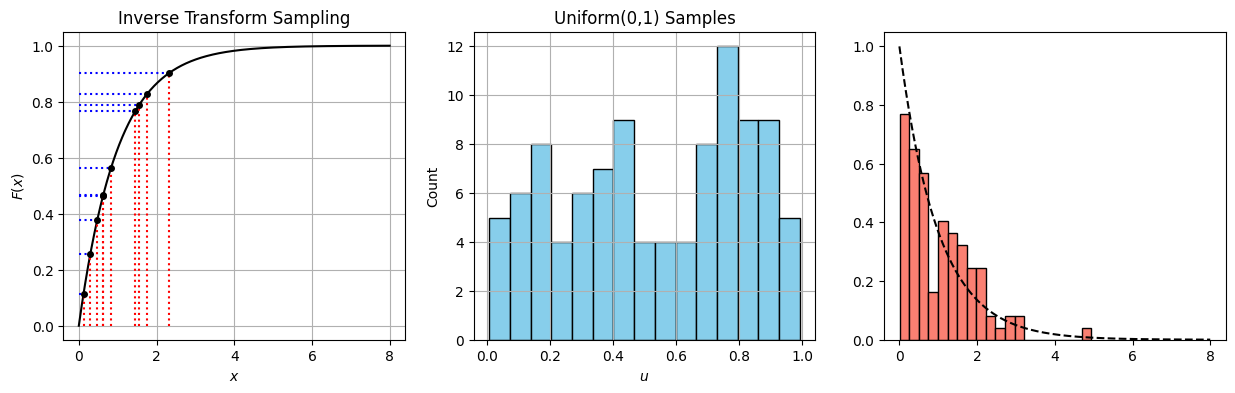

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# --- Sampling ---
n_samples = 100
u_samples = np.random.uniform(0, 1, n_samples)
x_samples = -np.log(1 - u_samples)/1  # Inverse CDF of Exp(1)

# For plotting the CDF
x_grid = np.linspace(0, 8, 500)
cdf_vals = expon.cdf(x_grid)

# For highlighting transformation (only show a few)
u_highlight = np.sort(u_samples[:10])
x_highlight = -np.log(1 - u_highlight)

# --- PLOT ---
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: CDF with inverse transform lines
axs[0].plot(x_grid, cdf_vals, label='CDF of Exp(1)', color='black')
for u, x in zip(u_highlight, x_highlight):
    axs[0].hlines(u, 0, x, color='blue', linestyle='dotted')
    axs[0].vlines(x, 0, u, color='red', linestyle='dotted')
    axs[0].plot(x, u, 'ko', markersize=4)

axs[0].set_title("Inverse Transform Sampling")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$F(x)$")
axs[0].grid(True)

# Plot 2: Histogram of uniform(0,1) samples
axs[1].hist(u_samples, bins=15, color="skyblue", edgecolor="black")
axs[1].set_title("Uniform(0,1) Samples")
axs[1].set_xlabel("$u$")
axs[1].set_ylabel("Count")
axs[1].grid(True)

# Plot 3: Histogram of exponential samples
axs[2].hist(x_samples, bins=20, color="salmon", edgecolor="black", density=True, label="Samples")
axs[2].plot(x_grid, expon.pdf(x_grid), 'k--', label='True PDF')  # overlay


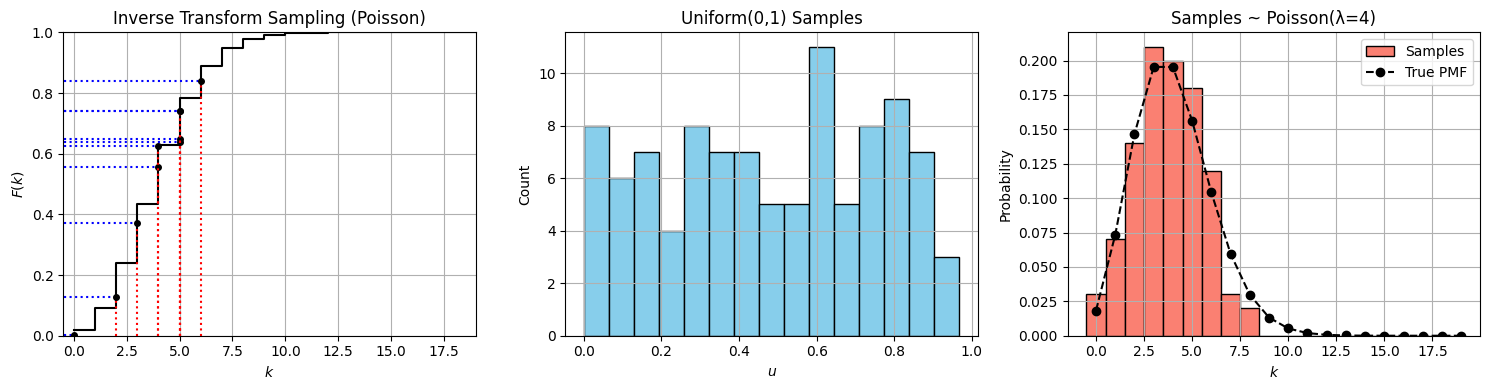

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lam = 4         # Poisson mean
n_samples = 100

# Step 1: Generate uniform samples
u_samples = np.random.uniform(0, 1, n_samples)

# Step 2: Inverse transform sampling for Poisson
def poisson_inverse_transform(u, lam):
    """Perform inverse CDF sampling for Poisson(λ)."""
    k = 0
    cdf = poisson.pmf(k, lam)
    while u > cdf:
        k += 1
        cdf += poisson.pmf(k, lam)
    return k

x_samples = np.array([poisson_inverse_transform(u, lam) for u in u_samples])

# Step 3: CDF grid
k_vals = np.arange(0, 20)
cdf_vals = poisson.cdf(k_vals, lam)

# Use a few points for illustrating transformation
u_highlight = np.sort(u_samples[:10])
x_highlight = [poisson_inverse_transform(u, lam) for u in u_highlight]

# --- Plotting ---
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: CDF and mapping lines
axs[0].step(k_vals, cdf_vals, where='post', color='black', label='Poisson CDF (λ=4)')

for u, x in zip(u_highlight, x_highlight):
    axs[0].hlines(u, -1, x, color='blue', linestyle='dotted')
    axs[0].vlines(x, 0, u, color='red', linestyle='dotted')
    axs[0].plot(x, u, 'ko', markersize=4)

axs[0].set_xlim(-0.5, max(k_vals))
axs[0].set_ylim(0, 1)
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('$F(k)$')
axs[0].set_title("Inverse Transform Sampling (Poisson)")
axs[0].grid(True)

# Plot 2: Histogram of uniform samples
axs[1].hist(u_samples, bins=15, color="skyblue", edgecolor="black")
axs[1].set_title("Uniform(0,1) Samples")
axs[1].set_xlabel("$u$")
axs[1].set_ylabel("Count")
axs[1].grid(True)

# Plot 3: Histogram of Poisson samples
axs[2].hist(x_samples, bins=np.arange(0, 20) - 0.5, color="salmon", edgecolor="black", density=True, label="Samples")
axs[2].plot(k_vals, poisson.pmf(k_vals, lam), 'ko--', label='True PMF')
axs[2].set_title(f"Samples ~ Poisson(λ={lam})")
axs[2].set_xlabel("$k$")
axs[2].set_ylabel("Probability")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


## Accept Reject Algorithm 


\begin{align}
    X &\sim g\\
    U &\sim \text{Unif}(0,1)\\
    \text{Accept if } U &< \frac{f(u)}{c g(u)}
\end{align}

Define 

\begin{align}
    h(x,u) = 1 \cdot g(x)\\
    supp(H) = supp(X) \times [0,1]
\end{align}

The goal is to find $P(X | \text{Accept})$

\begin{align}
    P(X<x, \text{Accept}) &= \int_{-\infty}^{x} \int_{0}^{\frac{f(x)}{c g(x)}} h(x,u) \; du dx\\
                        &= \int_{-\infty}^{x} 1 \cdot g(x) u |_{0}^{\frac{f(x)}{c g(x)}} \\ 
                        &= \int_{-\infty}^{x} g(x) \frac{f(x)}{c g(x)} \\ 
                        &= \frac{1}{c} \int_{-\infty}^{x} f(x) \; dx
\end{align}


\begin{align}
    P(\text{Accept}) &= \int_{-\infty}^{\infty} \int_{0}^{\frac{f(x)}{cg(x)}} h(x,u) \; du \, dx \\
                     &= \int_{-\infty}^{\infty} \frac{f(x)}{c g(x)} g(x) \; du\, dx \\ 
                     &= \int_{-\infty}^{\infty} \frac{1}{c} f(x) \; dx \\ 
                     &= \frac{1}{c}
\end{align}

\begin{align}
    P(X<x | \text{Accept}) = \frac{\frac{1}{c} \int_{-\infty}^{x} f(x) \; dx}{ \frac{1}{c}} = \int_{-\infty}^{x} f_{Y}(x) \; dx = F_{Y}(x)
\end{align}


Using M = 0.291 for rejection bound


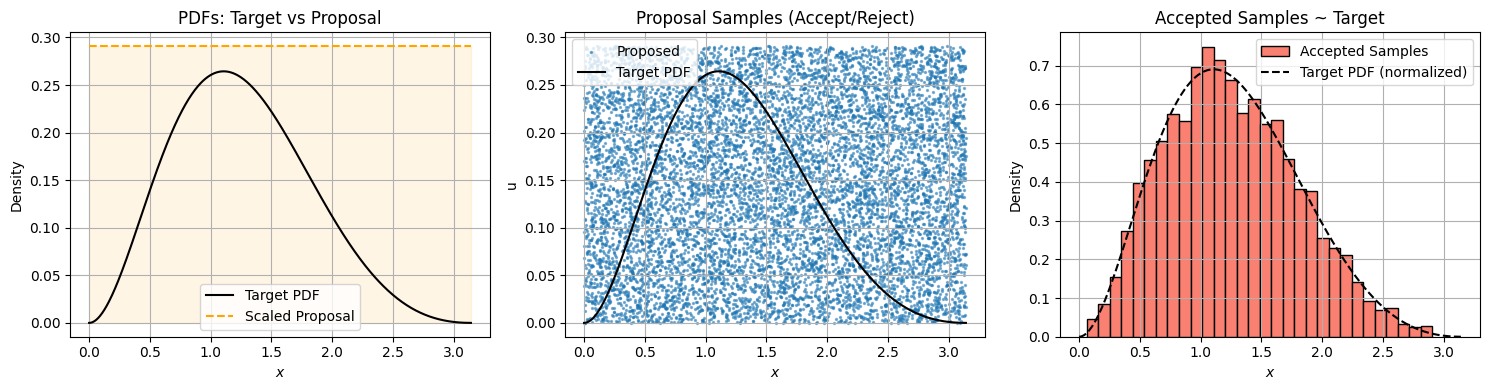

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Target and Proposal ---
def target_pdf(x):
    return np.exp(-x) * (np.sin(x)**2)  # Not normalized

def proposal_pdf(x):
    return np.ones_like(x)  # Uniform on [0, π]

# --- Settings ---
N = 10000
x_min, x_max = 0, np.pi
x_grid = np.linspace(x_min, x_max, 500)

# Normalize target to get max for rejection
unnormalized = target_pdf(x_grid)
M = 1.1 * np.max(unnormalized)  # Safety buffer
print(f"Using M = {M:.3f} for rejection bound")

# --- Rejection Sampling ---
proposal_samples = np.random.uniform(x_min, x_max, N)
proposal_heights = np.random.uniform(0, M, N)
target_vals = target_pdf(proposal_samples)
accepted = proposal_heights < target_vals

accepted_samples = proposal_samples[accepted]

# --- Plotting ---
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Panel 1: Proposal and Target PDFs
axs[0].plot(x_grid, target_pdf(x_grid), label="Target PDF", color='black')
axs[0].plot(x_grid, M * proposal_pdf(x_grid), label="Scaled Proposal", color='orange', linestyle='--')
axs[0].fill_between(x_grid, 0, proposal_pdf(x_grid)*M, color='orange', alpha=0.1)
axs[0].set_title("PDFs: Target vs Proposal")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("Density")
axs[0].legend()
axs[0].grid(True)

# Panel 2: Proposal samples with rejection
axs[1].scatter(proposal_samples, proposal_heights, s=2, alpha=0.5, label="Proposed")
axs[1].plot(x_grid, target_pdf(x_grid), color='black', label='Target PDF')
axs[1].set_title("Proposal Samples (Accept/Reject)")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("u")
axs[1].legend()
axs[1].grid(True)

# Panel 3: Accepted Samples
axs[2].hist(accepted_samples, bins=30, density=True, color='salmon', edgecolor='black', label="Accepted Samples")
axs[2].plot(x_grid, target_pdf(x_grid) / np.trapz(target_pdf(x_grid), x_grid), 'k--', label="Target PDF (normalized)")
axs[2].set_title("Accepted Samples ~ Target")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel("Density")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()